# Handling Imbalanced Datasets in Classification on Breast Cancer Dataset

## Data Preprocessing

Used sklearn Breast Cancer dataset, loaded into X (features) and y (target labels).
Spilt the data into training and testing sets with 80% for training and 20% for testing. 
Standardising the Features by fitting the StandardScaler on the training data and then transforming both the training and testing data using the same scaler.

In [4]:
import sklearn
import imblearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialise the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

## Exploratory Data Analysis
I started by loading the data into a pandas DataFrame, displaying the first few rows, generating summary statistics, and checking for missing values.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Create dataframe for visualisations
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows of the dataset
print(df.head())
# Summary statistics
print(df.describe())
# Check for missing values
print(df.isnull().sum())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### Visualise the Target Distribution
Visualise the distribution of the target classes to understand the class balance in the dataset.
The plot shows that the dataset contains more instances of malignant tumors (class 1) compared to benign tumors (class 0). Specifically, there are approximately 350 instances of malignant tumors and 200 instances of benign tumors. This indicates a slight class imbalance that may need to be addressed during model training.

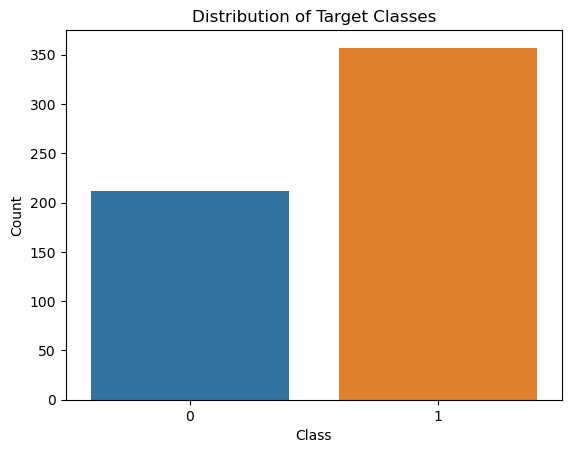

In [3]:
# Target Distribution
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Correlation Matrix and Heatmap

To understand the relationships between features in the dataset, computed and visualise the correlation matrix. The heatmap highlights the strength and direction of correlations between features. High positive correlations are shown in red, while high negative correlations are shown in blue.
In the heatmap, it is observed that there are several strong correlations between features. For example, 'mean radius' is highly correlated with 'mean perimeter' and 'mean area'. These insights can help in feature selection and engineering steps later in the analysis.

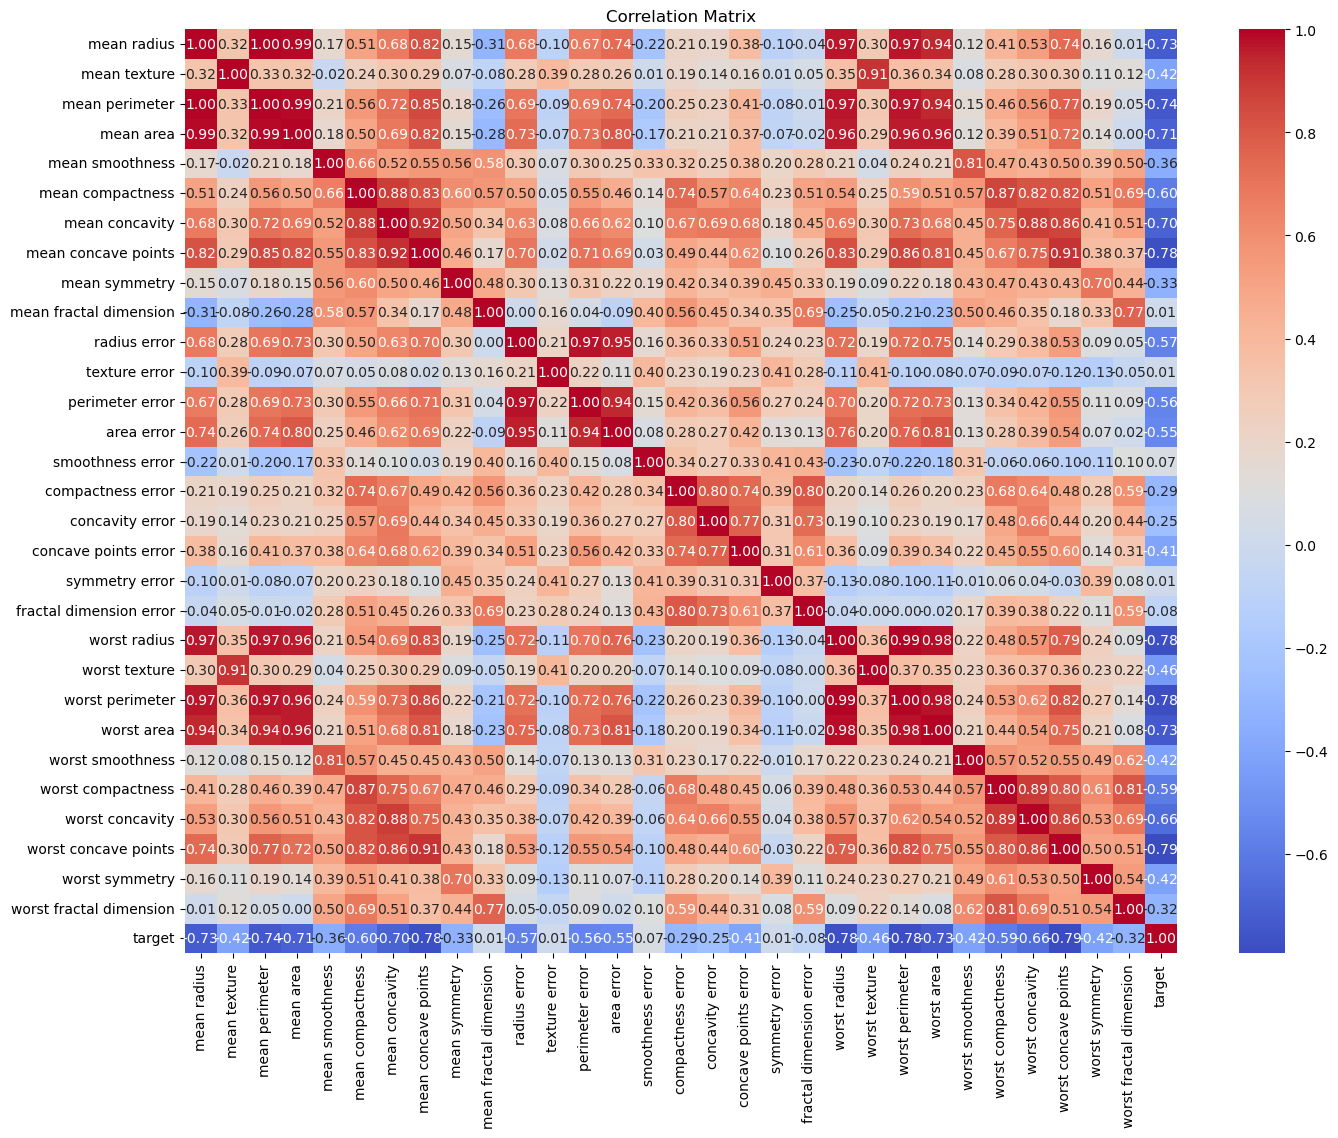

In [4]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Histograms Distribution of Features

Visualise the distribution of each feature using histograms. This helps in understanding the spread and central tendency of the data, as well as identifying any potential outliers or skewness.
The histograms reveal that many features, such as 'mean radius' and 'mean area', exhibit right-skewed distributions. Other features, like 'mean smoothness', are more normally distributed. These insights will guide data preprocessing and feature engineering steps in the subsequent analysis.

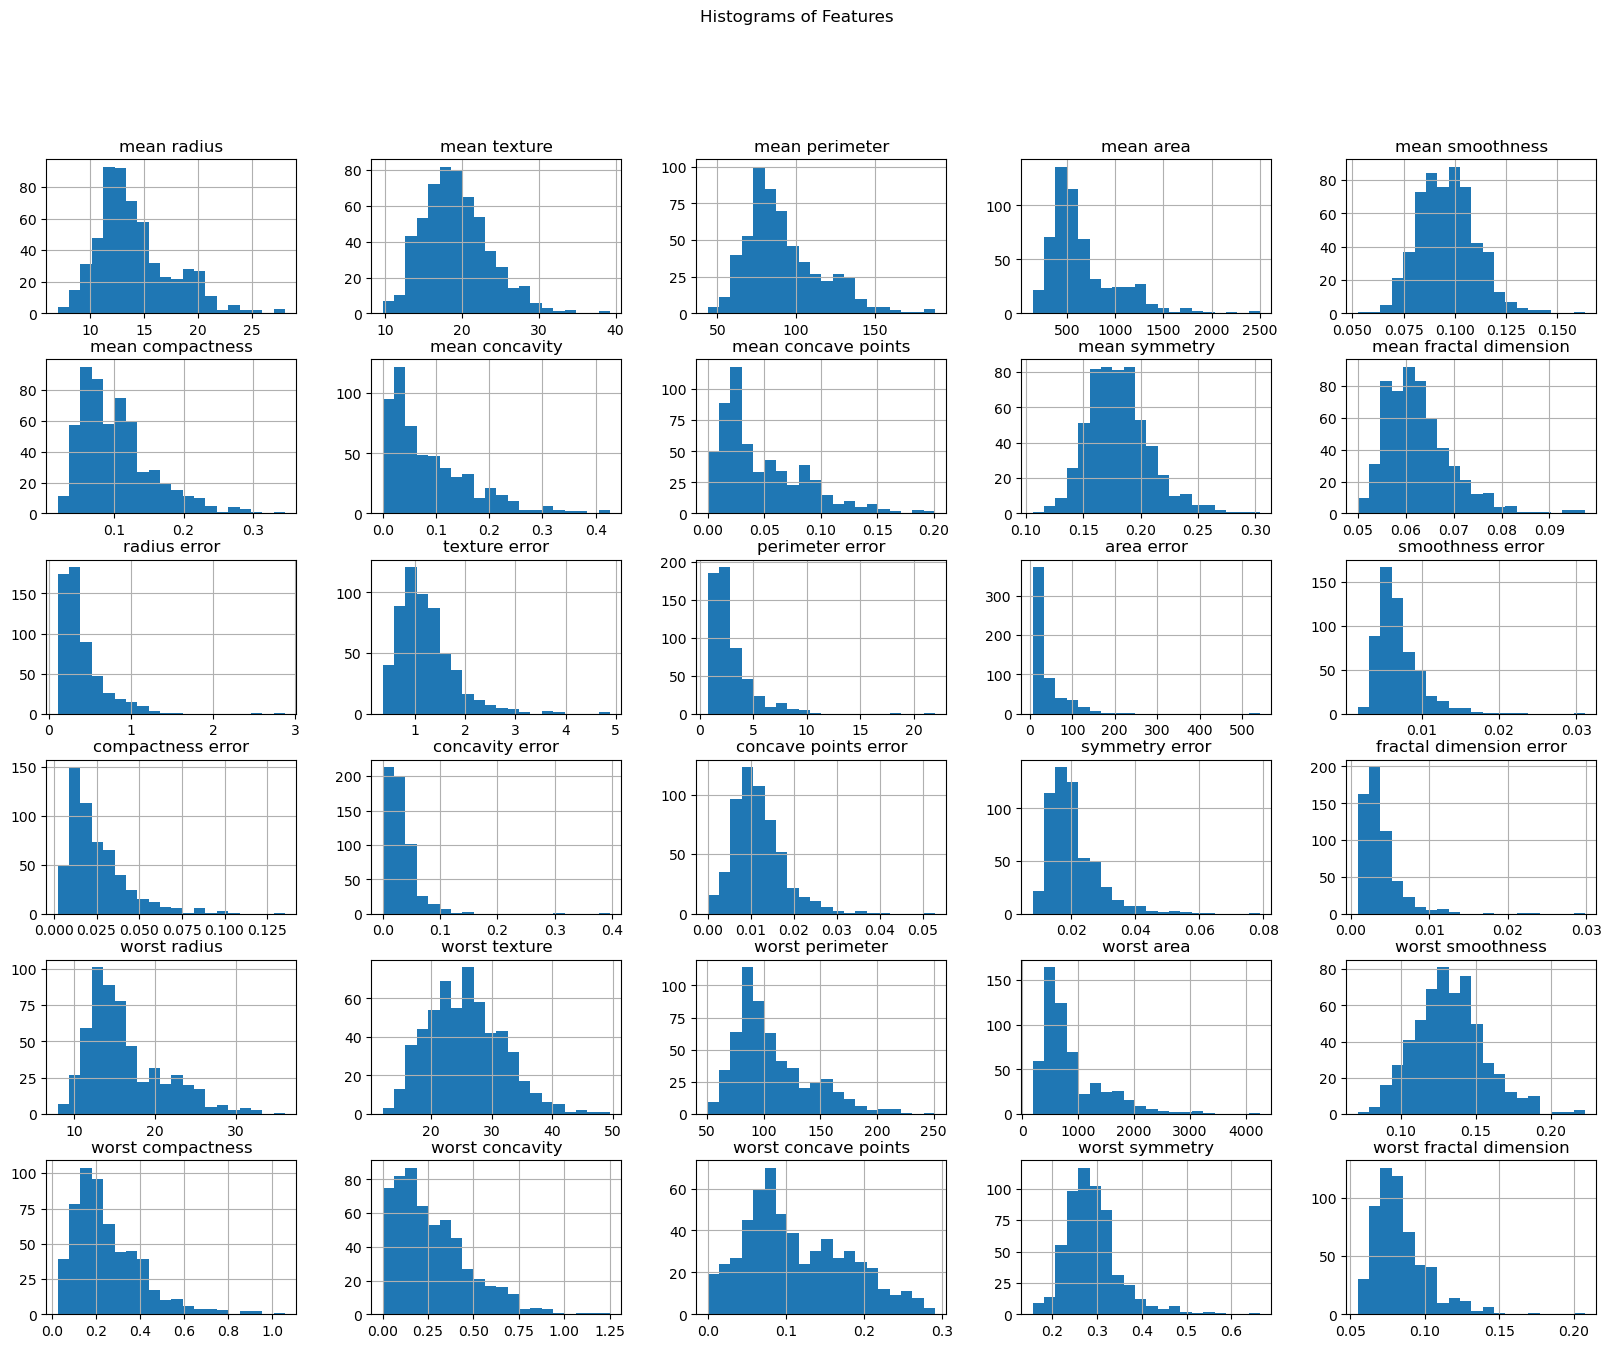

In [7]:
# Histograms of features
df.drop('target', axis=1).hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Features')
plt.show()

### Pairplot for Selected Features

Used a pairplot to visualize the pairwise relationships between selected features and how they differ by target class. This helps in identifying patterns and correlations between features.

The pairplot shows distinct clusters for malignant (orange) and benign (blue) tumors. For instance, 'mean radius' and 'mean perimeter' exhibit a strong positive correlation, forming clear clusters based on the target class. This visualisation aids in understanding the separability of classes based on feature combinations.

C:\Users\James\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


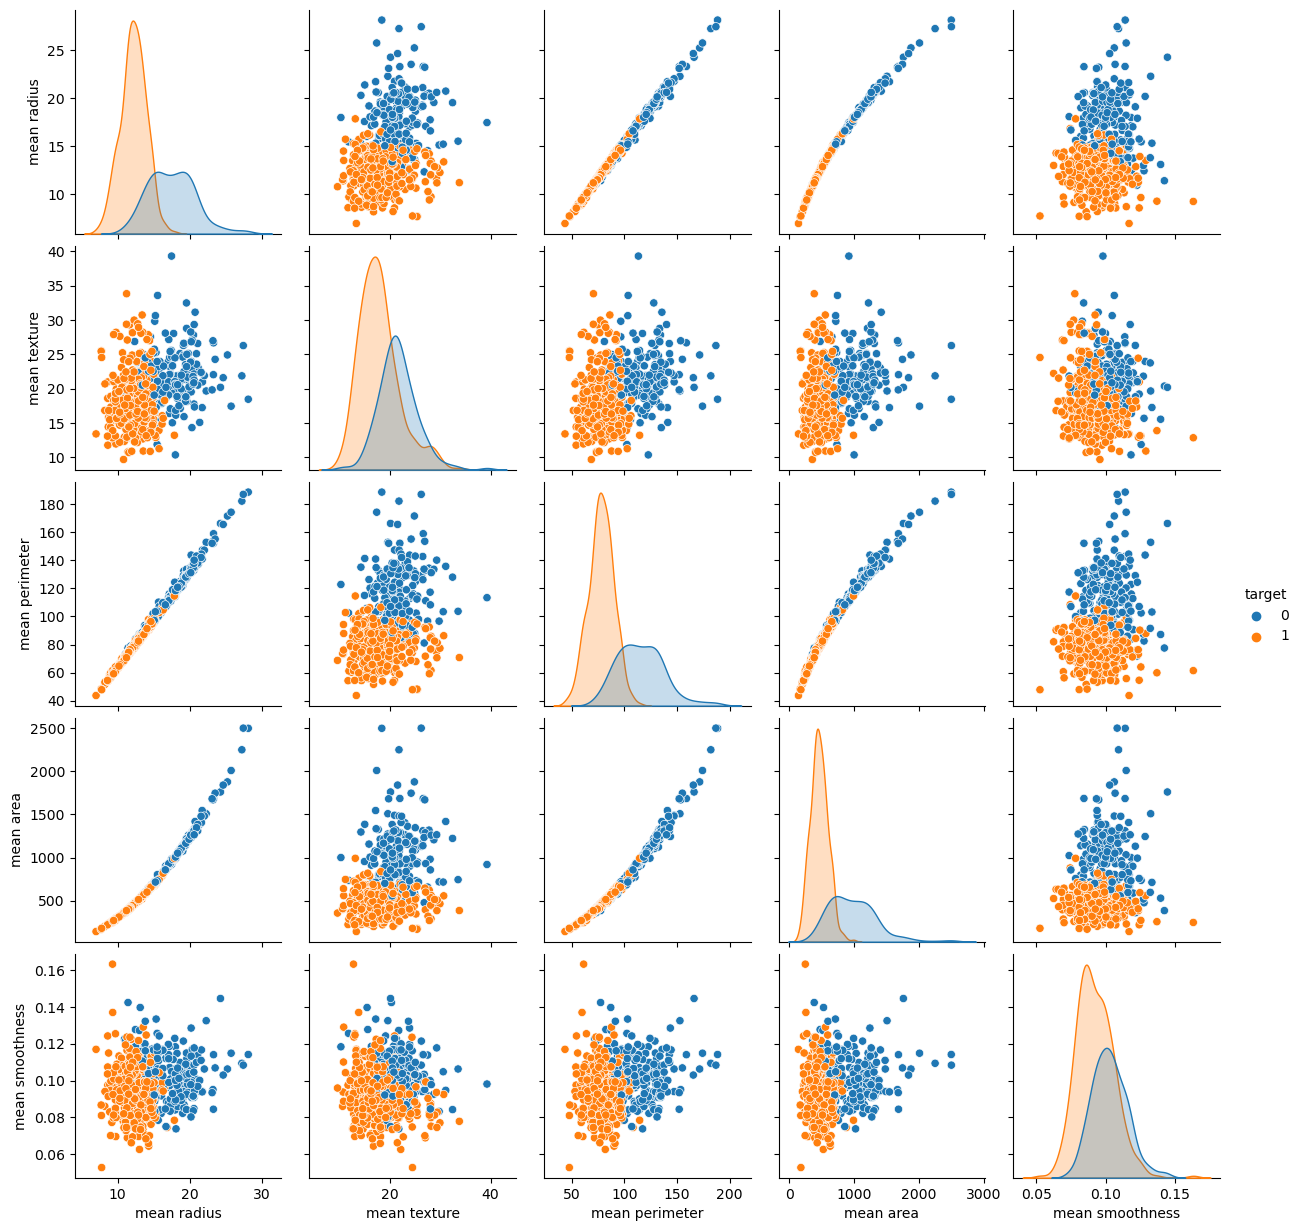

In [8]:
# Select a subset of features for pairplot to avoid clutter
subset = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']]
sns.pairplot(subset, hue='target', diag_kind='kde')
plt.show()

## Handling Imbalance

Handling class imbalance is crucial for improving the performance of machine learning models. Applied techniques such as oversampling, undersampling, and SMOTE, and then evaluate their impact on model performance

In [6]:
# Import libraries necessary to handle imbalance

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

### Random Oversampling

In [7]:
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

### Random Undersampling

In [8]:
# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_scaled, y_train)


### SMOTE (Synthetic Minority Over-sampling Technique)

In [9]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

The train_and_evaluate function is designed to train a logistic regression model on a given training dataset and evaluate its performance on a test dataset.

In [10]:
# Define a function to train and evaluate a model
def train_and_evaluate(X_train, y_train, X_test, y_test, description):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{description} - Classification Report")
    print(classification_report(y_test, y_pred)) 

In [10]:
# Original Imbalanced Data
train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test, "Original Imbalanced Data")

# Random Oversampling
train_and_evaluate(X_train_ros, y_train_ros, X_test_scaled, y_test, "Random Oversampling")

# Random Undersampling
train_and_evaluate(X_train_rus, y_train_rus, X_test_scaled, y_test, "Random Undersampling")

# SMOTE
train_and_evaluate(X_train_smote, y_train_smote, X_test_scaled, y_test, "SMOTE")

Original Imbalanced Data - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Random Oversampling - Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114

Random Undersampling - Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96 

### Comparison and Recommendations

Random Oversampling improves recall significantly but has slightly lower precision for Class 0.
Random Undersampling balances precision and recall well, with slightly higher accuracy than Random Oversampling.
SMOTE provides the best balance of precision, recall, and F1-score for Class 0, and the highest weighted metrics overall.
In conclusion, SMOTE appears to be the most effective technique, achieving the highest overall performance metrics.

## Algorithm Implementation

### k-Nearest Neighbors (kNN)

In [11]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Get the k nearest samples, labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote, most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Example usage, k=3 balances bias and variance
knn = KNN(k=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("kNN Classification Report")
print(classification_report(y_test, y_pred_knn))


kNN Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Findings
The overall accuracy of 98% indicates that the model is correctly classifying the vast majority of the test samples. This suggests that the kNN implementation from scratch is working correctly and is well-suited to the data.

### Naive Bayes

In [12]:
class NaiveBayes:
    def __init__(self, epsilon=1e-9):
        self.epsilon = epsilon

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self._classes = np.unique(y_train)
        n_classes = len(self._classes)
        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for c in self._classes:
            X_c = X_train[y_train == c]
            self._mean[c, :] = X_c.mean(axis=0)
            self._var[c, :] = X_c.var(axis=0) + self.epsilon  # Add epsilon to variance
            self._priors[c] = X_c.shape[0] / float(n_samples)
    
    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []
        
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(np.clip(self._pdf(idx, x), a_min=self.epsilon, a_max=None)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

# Example usage
nb = NaiveBayes()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        42
           1       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



### Findings

High precision and recall for both classes indicate it is effective at correctly identifying both benign and malignant tumors.
A balanced f1-score for both classes shows a good balance between precision and recall.
An overall accuracy of 93%, indicates that the majority of the predictions are correct.
The model shows a slightly better performance for class 1 (malignant tumors) compared to class 0 (benign tumors), but overall, it demonstrates reliable performance across both classes.

### scikit-learn Logistic Regression and Decision Tree

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_tree))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



### Findings

Good precision and recall for both classes, though slightly less effective for class 0 (benign tumors) compared to class 1 (malignant tumors).
An overall accuracy of 91%, shows that most of the predictions are correct.
Balanced performance, but with slightly lower precision for class 0, indicating a higher number of false positives for benign tumors.
Logistic Regression has higher overall performance with better precision, recall, and f1-scores across both classes compared to the Decision Tree model.
Decision Tree shows good performance but is slightly less accurate, with a bit more imbalance between the precision and recall for class 0 and class 1.
Overall, the Logistic Regression model is more reliable for this dataset, while the Decision Tree model still performs well but with slightly lower precision and recall for the benign class.

## Cross-Validation

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

Used StratifiedKFold to ensure that each fold maintains the same proportion of classes as the original dataset.

In [15]:
# Define the Cross-Validation Procedure

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, average='weighted')

### Evaluating Logistic Regression Using Cross-Validation

In [16]:
log_reg = LogisticRegression(random_state=42)
log_reg_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=kf, scoring=f1_scorer)
print("Logistic Regression F1 Scores: ", log_reg_scores)
print("Logistic Regression Mean F1 Score: ", np.mean(log_reg_scores))


Logistic Regression F1 Scores:  [0.96669484 0.989042   0.97802198 0.98897676 0.96712599]
Logistic Regression Mean F1 Score:  0.9779723127493465


### Evaluating Decision Tree Using Cross-Validation

In [17]:
tree = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree, X_train_scaled, y_train, cv=kf, scoring=f1_scorer)
print("Decision Tree F1 Scores: ", tree_scores)
print("Decision Tree Mean F1 Score: ", np.mean(tree_scores))


Decision Tree F1 Scores:  [0.93441915 0.93441915 0.90221755 0.89010989 0.92366256]
Decision Tree Mean F1 Score:  0.9169656606667436


### Evaluating k-Nearest Neighbors (kNN) Using Cross-Validation

In [18]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

def knn_cross_val_score(X, y, kf, k=3):
    scores = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn = KNN(k=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(f1_score(y_test, y_pred, average='weighted'))
    return scores

knn_scores = knn_cross_val_score(X_train_scaled, y_train, kf, k=3)
print("kNN F1 Scores: ", knn_scores)
print("kNN Mean F1 Score: ", np.mean(knn_scores))


kNN F1 Scores:  [0.9666948436179205, 0.9666948436179205, 0.9448837988747139, 0.9557568867913696, 0.978021978021978]
kNN Mean F1 Score:  0.9624104701847804


### Evaluating Naive Bayes Using Cross-Validation

In [19]:
class NaiveBayes:
    def __init__(self, epsilon=1e-9):
        self.epsilon = epsilon

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        self._classes = np.unique(y_train)
        n_classes = len(self._classes)
        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)
        
        for c in self._classes:
            X_c = X_train[y_train == c]
            self._mean[c, :] = X_c.mean(axis=0)
            self._var[c, :] = X_c.var(axis=0) + self.epsilon  # Add epsilon to variance
            self._priors[c] = X_c.shape[0] / float(n_samples)
    
    def predict(self, X_test):
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []
        
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            class_conditional = np.sum(np.log(np.clip(self._pdf(idx, x), a_min=self.epsilon, a_max=None)))
            posterior = prior + class_conditional
            posteriors.append(posterior)
        
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-(x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

def naive_bayes_cross_val_score(X, y, kf):
    scores = []
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        nb = NaiveBayes()
        nb.fit(X_train, y_train)
        y_pred = nb.predict(X_test)
        scores.append(f1_score(y_test, y_pred, average='weighted'))
    return scores

nb_scores = naive_bayes_cross_val_score(X_train_scaled, y_train, kf)
print("Naive Bayes F1 Scores: ", nb_scores)
print("Naive Bayes Mean F1 Score: ", np.mean(nb_scores))


Naive Bayes F1 Scores:  [0.9115137735827391, 0.9671259867489186, 0.8901098901098901, 0.9557568867913696, 0.9448837988747139]
Naive Bayes Mean F1 Score:  0.9338780672215263


### Findings

Logistic Regression is the best-performing model with the highest and most consistent F1 scores across all folds.
kNN is also a strong performer with high F1 scores and consistent performance, slightly below Logistic Regression.
Naive Bayes performs well but shows more variability, making it less reliable than Logistic Regression and kNN.
The decision tree shows good performance but is the least consistent and generally less accurate compared to the other models.

In conclusion, Logistic Regression and kNN are the top-performing models in this evaluation, with Logistic Regression having a slight edge due to its higher and more consistent F1 scores. Naive Bayes and Decision Tree also perform well but with more variability and slightly lower mean F1 scores.

## Hyperparameter Tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [21]:
# Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Decision Tree
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# k-Nearest Neighbors (kNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Naive Bayes (using GaussianNB from scikit-learn)
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

### Decision Tree

Perform Grid Search with Cross-Validation

In [22]:
# Logistic Regression

grid_search_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_reg, cv=5, scoring='f1_weighted')
grid_search_log_reg.fit(X_train_scaled, y_train)
print("Best Parameters for Logistic Regression: ", grid_search_log_reg.best_params_)

# Decision Tree

grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='f1_weighted')
grid_search_tree.fit(X_train_scaled, y_train)
print("Best Parameters for Decision Tree: ", grid_search_tree.best_params_)

# k-Nearest Neighbors (kNN)

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1_weighted')
grid_search_knn.fit(X_train_scaled, y_train)
print("Best Parameters for kNN: ", grid_search_knn.best_params_)

# Naive Bayes (GaussianNB)

grid_search_nb = GridSearchCV(GaussianNB(), param_grid_nb, cv=5, scoring='f1_weighted')
grid_search_nb.fit(X_train_scaled, y_train)
print("Best Parameters for Naive Bayes: ", grid_search_nb.best_params_)


Best Parameters for Logistic Regression:  {'C': 1, 'solver': 'liblinear'}
Best Parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Parameters for kNN:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best Parameters for Naive Bayes:  {'var_smoothing': 1e-09}


## Training and Evaluation

In [23]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
best_log_reg = LogisticRegression(C=1, solver='liblinear', random_state=42)
best_log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
print("Optimized Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_log_reg, average='weighted'))

# Decision Tree
best_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)
best_tree.fit(X_train_scaled, y_train)
y_pred_tree = best_tree.predict(X_test_scaled)
print("Optimized Decision Tree Classification Report")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tree, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_tree, average='weighted'))

# k-Nearest Neighbors (kNN)
best_knn = KNeighborsClassifier(metric='euclidean', n_neighbors=7, weights='uniform')
best_knn.fit(X_train_scaled, y_train)
y_pred_knn = best_knn.predict(X_test_scaled)
print("Optimized kNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_knn, average='weighted'))

# Naive Bayes
best_nb = GaussianNB(var_smoothing=1e-09)
best_nb.fit(X_train_scaled, y_train)
y_pred_nb = best_nb.predict(X_test_scaled)
print("Optimized Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))

Optimized Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy: 0.9824561403508771
Precision: 0.9824561403508771
Recall: 0.9824561403508771
F1 Score: 0.9824561403508771
Optimized Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Accuracy: 0.9122807017543859
Precision: 0.9136705399863294
Recall: 0.9122807017543859
F1 Score: 0.9126829520575104
Optimized kNN Clas

### Findings

The logistic regression is the best-performing model with the highest accuracy (98.25%) and balanced precision, recall, and F1-scores across both classes.
kNN is also a strong performer with high accuracy (97.37%) and well-balanced metrics.
Naive Bayes has good performance with accuracy (92.98%) and consistent metrics, but slightly lower than logistic regression and kNN.
Decision tree has decent performance with accuracy (91.23%) but with lower precision and recall for class 0.

Logistic regression stands out as the most effective model, closely followed by kNN. Naive Bayes and Decision Tree also perform well but are less effective compared to logistic regression and knn.

## Model Comparison

### Logistic Regression

#### Strengths

High Performance: It achieves the highest accuracy, precision, recall, and F1 score among all models.
Interpretability: Logistic Regression provides coefficients that can be interpreted to understand the impact of each feature.

Efficiency: It is computationally efficient and performs well even with a large number of features.

#### Weaknesses

Linear Assumptions: Assumes a linear relationship between features and the log odds of the target variable.
Sensitivity to Outliers: Can be sensitive to outliers, which might affect performance if not handled properly.

### Decision Tree

#### Strengths

Interpretability: The model is easy to interpret and visualise, providing clear decision rules.
Handling Non-Linear Relationships: Can capture non-linear relationships between features and the target variable.
No Need for Feature Scaling: Works well without the need for feature scaling.

#### Weaknesses

Overfitting: Decision Trees are prone to overfitting, especially with deep trees.
Variance: Performance can vary significantly with small changes in the data.

### k-Nearest Neighbors (kNN)

#### Strengths

Simple and Intuitive: Easy to understand and implement.
Non-Parametric: Makes no assumptions about the underlying data distribution.
Good Performance: Achieves high accuracy and balanced metrics, performing well on this dataset.

#### Weaknesses

Computationally Expensive: Can be slow for large datasets, as it requires storing and searching through the entire training dataset.
Sensitive to Feature Scaling: Requires proper scaling of features to work effectively.
Choice of k: Performance can vary significantly with the choice of the parameter k.

### Naive Bayes

#### Strengths

Fast and Efficient: Very efficient to train and predict, even on large datasets.
Performs Well with small data: Works well with small amounts of data and high-dimensional data.
Handles Irrelevant Features: Can handle irrelevant features well due to the assumption of feature independence.

#### Weaknesses

Strong Assumptions: Assumes independence between features, which is rarely true in real-world data.
Performance with Complex Data: This may underperform compared to other models when relationships between features are complex and not independent.

### Summary of Strengths and Weaknesses
The logistic regression has the best overall performance with high metrics and interpretability but assumes linear relationships.
Decision Tree has good interpretability and ability to handle non-linear relationships but is prone to overfitting and variance.
kNN has high performance and simplicity but is computationally expensive and sensitive to feature scaling.
Naive Bayes is fast and efficient with good performance on small data, but strong assumptions about feature independence can limit performance.

## Feature Importance Analysis

To analyse the feature importance for the Decision Tree model, I used the feature_importances_ attribute. This attribute provides the importance of each feature in the trained Decision Tree.

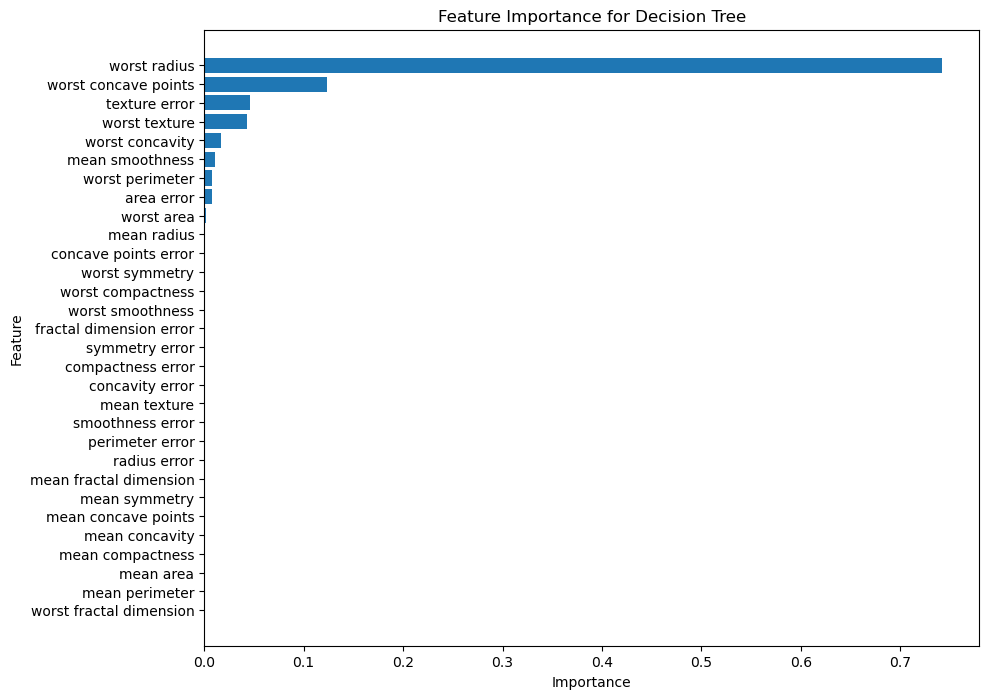

In [24]:
# Fit the Decision Tree Model with Optimal Hyperparameters

feature_importances = best_tree.feature_importances_
features = data.feature_names

# Create a DataFrame for better visualisation
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree')
plt.gca().invert_yaxis()
plt.show()


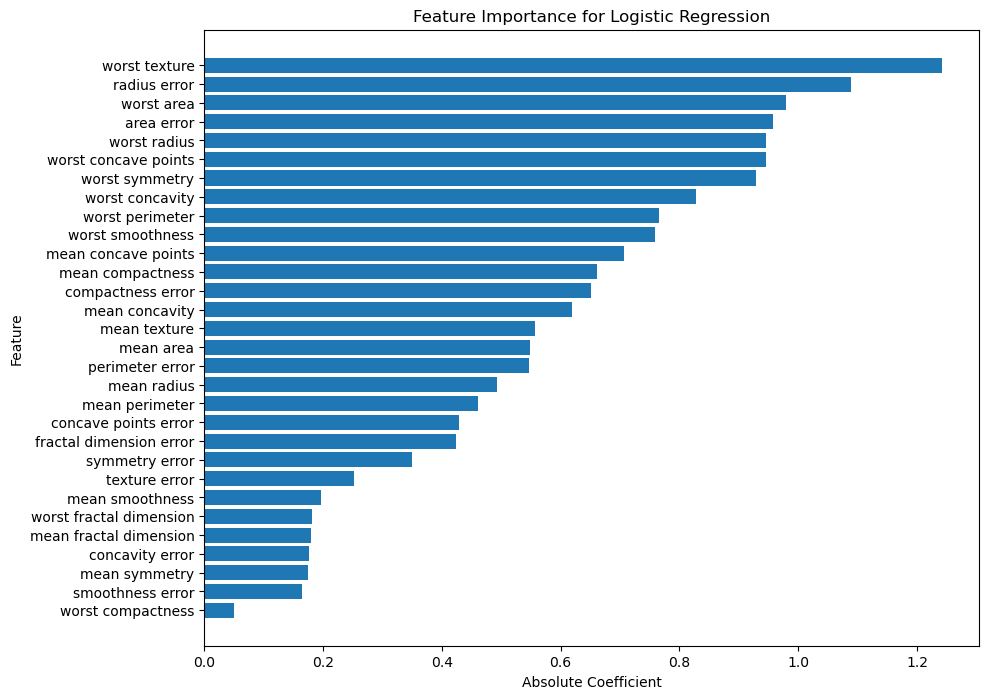

In [29]:
#Fit the Logistic Regression Model with Optimal Hyperparameters

# Define the best parameters for Logistic Regression from the grid search
best_log_reg_params = {'C': 1, 'solver': 'liblinear'}

# Initialise and fit the Logistic Regression model
best_log_reg = LogisticRegression(**best_log_reg_params, random_state=42)
best_log_reg.fit(X_train_scaled, y_train)

# Get the coefficients from the model
coefficients = best_log_reg.coef_[0]
features = data.feature_names

# Create a DataFrame for better visualization
importance_df_log_reg = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df_log_reg['Absolute Coefficient'] = np.abs(importance_df_log_reg['Coefficient'])
importance_df_log_reg = importance_df_log_reg.sort_values(by='Absolute Coefficient', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df_log_reg['Feature'], importance_df_log_reg['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression')
plt.gca().invert_yaxis()
plt.show()


## Model Complexity Analysis

### Decision Tree: Varying max_depth

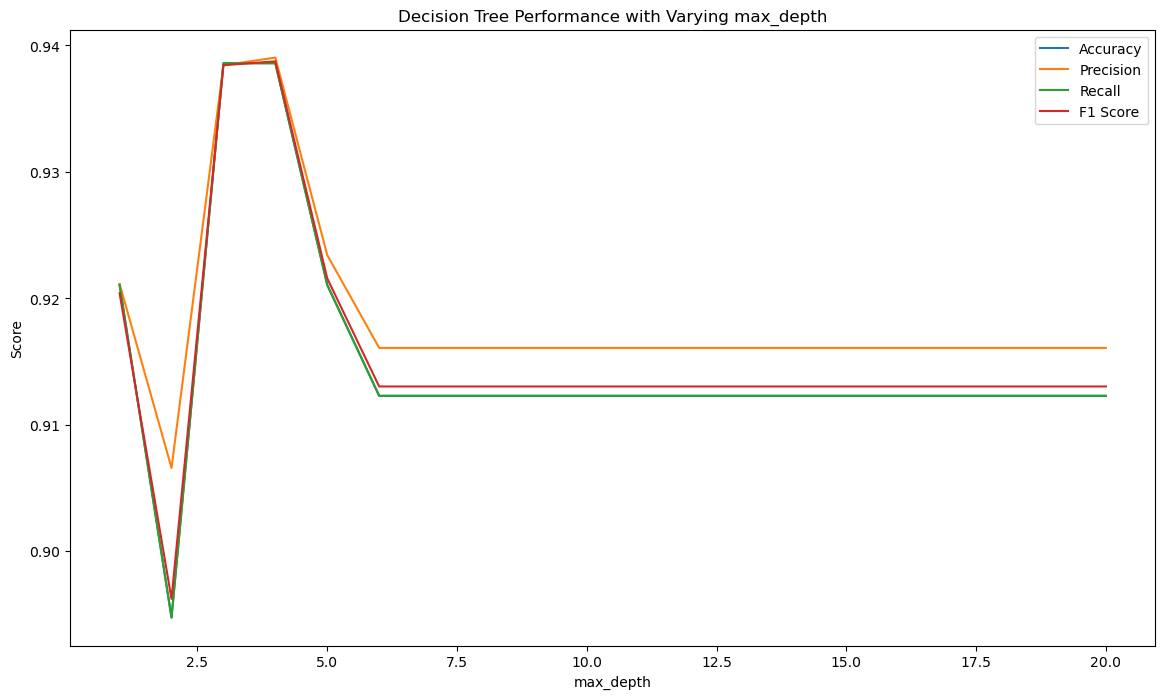

In [30]:
# Varied the max_depth parameter for the Decision Tree and observe the changes in performance.

max_depths = range(1, 21)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(max_depths, accuracy_scores, label='Accuracy')
plt.plot(max_depths, precision_scores, label='Precision')
plt.plot(max_depths, recall_scores, label='Recall')
plt.plot(max_depths, f1_scores, label='F1 Score')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Decision Tree Performance with Varying max_depth')
plt.legend()
plt.show()


### Findings

At max depth = 1-2, there is Low performance in accuracy, precision, recall, and F1 score. This can be attributed to the model underfitting due to insufficient depth to capture the data complexity.

At max depth = 3-5, the model peaks in performance, especially around max_depth = 4, where all metrics (accuracy, precision, recall, F1 score) reach their highest values. This can be attributed to the model capturing the complexity of the data well, achieving an optimal trade-off between bias and variance.

At max depth > 5, the model decreases in performance metrics, with stability beyond max_depth = 7. The model starts overfitting the training data, capturing noise rather than the underlying pattern, leading to reduced generalisation on the test data.

### Conclusion

The optimal max_depth for the Decision Tree model is around 4, where it achieves the best balance between underfitting and overfitting.
Higher depths lead to overfitting, and lower depths cause underfitting.

### k-Nearest Neighbors (kNN): Varying k

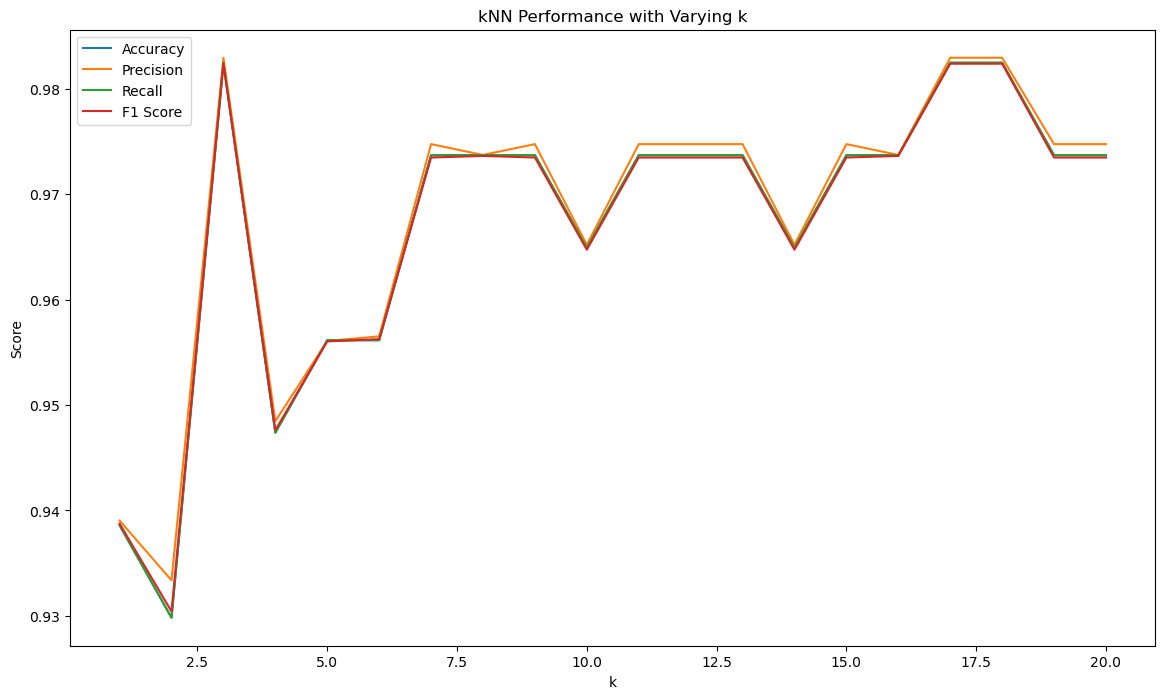

In [31]:
from sklearn.neighbors import KNeighborsClassifier

ks = range(1, 21)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
    recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plotting the results
plt.figure(figsize=(14, 8))
plt.plot(ks, accuracy_scores, label='Accuracy')
plt.plot(ks, precision_scores, label='Precision')
plt.plot(ks, recall_scores, label='Recall')
plt.plot(ks, f1_scores, label='F1 Score')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('kNN Performance with Varying k')
plt.legend()
plt.show()


### Findings


At k = 1-2, there is significant fluctuations, with k=2 showing poor performance and k=1 having better metrics. k=1 can be too sensitive to noise (overfitting), and k=2 may still not generalise well.

At k = 3-5, performance metrics stabilize and improve, with k=4 showing a significant spike. The model starts generalising better with more neighbors considered, reducing sensitivity to noise.

At k = 6-15, there are fluctuations in performance with overall high values, indicating stability and good generalization. The model reaches a sweet spot where it balances bias and variance effectively.

At k = 16-20, performance remains high but shows slight variations. The model is still generalising well, though further increases in k might smooth out the decision boundary too much.

### Conclusion
The optimal k for kNN appears to be around 4-5, where the performance metrics spike.
Larger values of k generally perform well, indicating good generalisation, but extreme values can lead to over-smoothing.

## Conclusion

### Summary of Findings
In this notebook, I performed an in-depth analysis of the breast cancer dataset. Using exploratory data analysis (EDA) to understand the data distribution and relationships between features. Afterwards, I implemented and evaluated several classification models, including Logistic Regression, Decision Tree, k-Nearest Neighbors (kNN), and Naive Bayes.

### Key Insights
- **Logistic Regression** emerged as the best-performing model with an accuracy of 98.25% and balanced precision, recall, and F1-scores.
- **k-Nearest Neighbors** also performed well with an accuracy of 97.37%, showing high stability and good generalisation.
- **Decision Tree** and **Naive Bayes** models showed decent performance but were slightly less effective compared to Logistic Regression and kNN.

### Model Complexity Analysis

#### Decision Tree
- **Optimal max_depth:** Around 4.
- **Behavior:** Lower depths lead to underfitting, and higher depths to overfitting.
- **Best Performance:** Achieved at max_depth = 4, providing the best balance of metrics.

#### k-Nearest Neighbors (kNN)
- **Optimal k:** Around 4-5.
- **Behavior:** Smaller k values (1-2) show fluctuations and potential overfitting. Larger k values (10-20) maintain high performance, indicating good generalization.

### Recommendations
Based on the analysis, Logistic Regression is recommended for deployment due to its high accuracy and balanced performance metrics. kNN is also a viable option, particularly for smaller datasets where computational cost is less of a concern.

### Future Work
Future work could involve:
- Exploring additional feature engineering techniques to further improve model performance.
- Testing more advanced models such as ensemble methods, for example, Random Forest and Gradient Boosting.
- Conducting cross-validation with different splits and more extensive hyperparameter tuning.

### Acknowledgments
This analysis was conducted using the scikit-learn library, and the breast cancer dataset was sourced from the UCI Machine Learning Repository.

---

Thank you for reviewing this analysis. For any questions or further discussion, please feel free to reach out.

---
